In [3]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X1*** and ***Product Size*** = ***Large*** and ***Sourcing Channel*** = ***WHOLESALE***

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Maersk/x1_large_wholesale_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,May-21,10.16
1,May-21,10.16
2,May-21,10.16
3,May-21,10.16
4,May-21,10.16


In [7]:
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2021-05-25,10.16
1,2021-05-25,10.16
2,2021-05-25,10.16
3,2021-05-25,10.16
4,2021-05-25,10.16


In [8]:
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
484,2020-07-25,5.55
489,2020-07-25,5.55
490,2020-07-25,5.55
491,2020-07-25,5.55
492,2020-07-25,5.55
...,...,...
35,2021-05-25,10.16
34,2021-05-25,10.16
33,2021-05-25,10.16
46,2021-05-25,10.16


(0.0, 500.0)

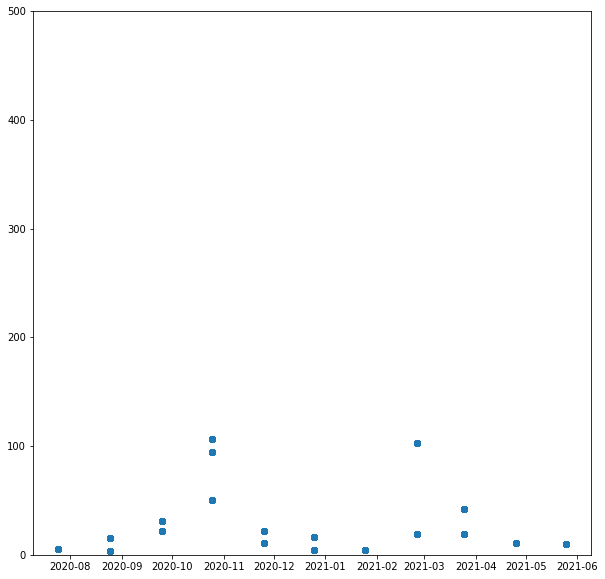

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,500))

In [10]:
# renaming the columns to symbolize the timestamp and the target
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [11]:
# instantiating an object of Prophet Class (Using the Prophet Forecasting model developed by Facebook)
model = Prophet(seasonality_mode='multiplicative')
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
# Making prediction on the filtered data
test_df = test_df[(test_df["Manufacturer"]=="X1") & (test_df["Product Size"]=="Large") & (test_df["Sourcing Channel"] =="WHOLESALE") ]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)


  ProductType Manufacturer Area Code  ...         ds      y       yhat
0        NTM3           X1       A28  ... 2021-06-25  84.48 -17.297015

[1 rows x 9 columns]


In [19]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

  ProductType Manufacturer Area Code  ...      y       yhat Absolute Error
0        NTM3           X1       A28  ...  84.48 -17.297015     101.777015

[1 rows x 10 columns]


In [20]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  101.77701525117953
